In [377]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import hvplot.pandas

In [378]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384


In [379]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [380]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file

scaler = StandardScaler()

In [381]:
# Create a DataFrame with the scaled data
scaled_data = scaler.fit_transform(market_data_df)

# Copy the crypto names from the original data
crypto_names = market_data_df.index

# Set the coinid column as index
market_data_df = pd.DataFrame(scaled_data, columns=market_data_df.columns, index=crypto_names)

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


### Find the Best Value for k Using the Original Scaled DataFrame.

In [382]:
# Create a list with the number of k-values to try use a range from 1 to 11
k_values = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k Inside the loop Create a KMeans model using the loop counter for the n_clusters
for k in k_values:
    model = KMeans(n_clusters=k, n_init='auto', random_state=2)
    model.fit(market_data_df)  # Fit the model to the data using the scaled DataFrame
    inertia.append(model.inertia_)
    
# Fit the model to the data using the scaled DataFrame


# 3. Append the model.inertia_ to the inertia list


# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df.head()

,k,inertia
0,1,287.000000
1,2,198.571818
2,3,145.635748
3,4,79.022435
4,5,66.217780


<Axes: title={'center': 'Elbow Curve'}, xlabel='Number of clusters k', ylabel='Inertia'>

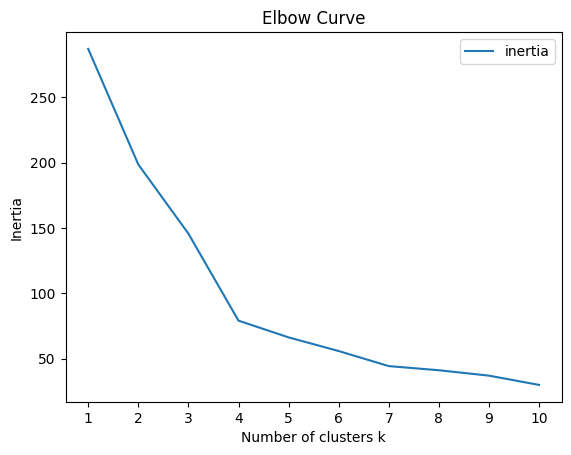

In [383]:
# Plot a line chart with all the inertia values computed with the different values of k to visually identify the optimal value for k.
elbow_df.plot.line(x="k", y="inertia", xticks=k_values, title="Elbow Curve", xlabel="Number of clusters k", ylabel="Inertia")


#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** The best value of K seems to be 7

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [384]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=0)

In [385]:
# Fit the K-Means model using the scaled data
model.fit(market_data_df)

KMeans(n_clusters=4, random_state=0)

In [386]:
# Predict the clusters to group the cryptocurrencies using the scaled data
crypto_clusters = model.predict(market_data_df)

# View the resulting array of cluster values.
crypto_clusters

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0])

In [387]:
# Create a copy of the DataFrame
clustered_df = market_data_df.copy()

In [388]:
# Add a new column to the DataFrame with the predicted clusters
clustered_df["class"] = model.labels_

# Display sample data
clustered_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,class
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,2
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,2
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,2
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,2


<Axes: title={'center': 'Crypto Clusters'}, xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

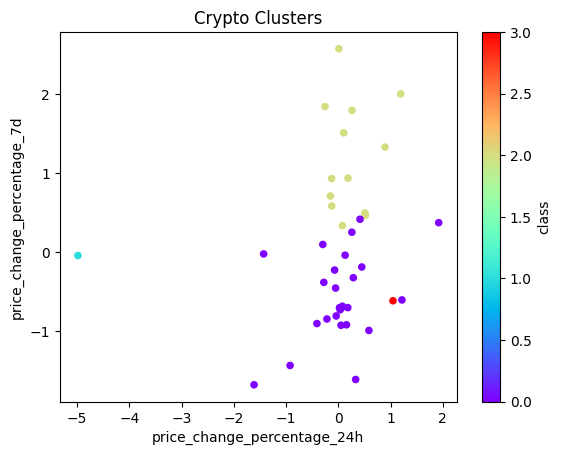

In [389]:
# Create a scatter plot using Pandas plot by setting x=price_change_percentage_24h and y=price_change_percentage_7d Use rainbow for the color to better visualize the data

clustered_df.plot.scatter(x="price_change_percentage_24h", y="price_change_percentage_7d", c="class", colormap="rainbow", title="Crypto Clusters")

### Optimize Clusters with Principal Component Analysis.

In [390]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [391]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
crypto_pca = pca.fit_transform(market_data_df)

# View the first five rows of the DataFrame. 
crypto_pca[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [392]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** Total Explained varience is 0.3719856 + 0.34700813 + 0.17603793 = 0.89503166
About 89.5% of the total variance is condensed into the Principle Component variables.

In [393]:
# Create a new DataFrame with the PCA data.
pcs_df = pd.DataFrame(
    data=crypto_pca, columns=["principal component 1", "principal component 2", "principal component 3"], index=crypto_names
)
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
pcs_df = pd.DataFrame(
    data=crypto_pca, columns=["principal component 1", "principal component 2", "principal component 3"], index=crypto_names
)

# Copy the crypto names from the original data
crypto_names = market_data_df.index

# Set the coinid column as index
pcs_df = pd.DataFrame(crypto_pca, columns=["principal component 1", "principal component 2", "principal component 3"], index=crypto_names)

# Display sample data
pcs_df.head(10)

,principal component 1,principal component 2,principal component 3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


### Find the Best Value for k Using the PCA Data

In [394]:
# Create a list with the number of k-values to try use a range from 1 to 11
list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(pcs_df)
    inertia.append(model.inertia_)
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.

# 3. Append the model.inertia_ to the inertia list


# Create a dictionary with the data to plot the Elbow curve
dict1 = {"k": k_values, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df = pd.DataFrame(dict1)

# Display the DataFrame
df

,k,inertia
0,1,256.874086
1,2,168.811896
2,3,115.918077
3,4,49.665497
4,5,41.357314
5,6,30.796642
6,7,25.915457
7,8,21.890936
8,9,17.720699
9,10,13.838699


<Axes: title={'center': 'Elbow Curve'}, xlabel='Number of clusters k', ylabel='Inertia'>

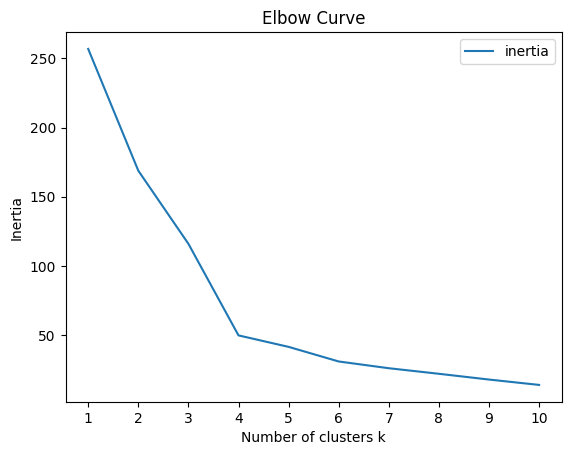

In [395]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df.plot.line(x="k", y="inertia", xticks=k_values, title="Elbow Curve", xlabel="Number of clusters k", ylabel="Inertia")

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**  Here Best value of K is 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Yes, it seems like there it the K value was 7 and here it is 4, which reduced with less number of clusters giving the optimum value. 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [396]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=0)

In [397]:
# Fit the K-Means model using the PCA data
model.fit(pcs_df)

KMeans(n_clusters=4, random_state=0)

In [398]:
# Predict the clusters to group the cryptocurrencies using the PCA data
crypto_clusters = model.predict(pcs_df)

# Print the resulting array of cluster values.
crypto_clusters

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0])

In [399]:
# Create a copy of the DataFrame with the PCA data
clustered_df = pcs_df.copy()

# Add a new column to the DataFrame with the predicted clusters
clustered_df["class"] = model.labels_

# Display sample data
clustered_df.head()

,principal component 1,principal component 2,principal component 3,class
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [400]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
# Use "class" for the color to better visualize the data.
clustered_df.hvplot.scatter(x="principal component 1", y="principal component 2", by="class", title="Crypto Clusters")



:NdOverlay   [class]
   :Scatter   [principal component 1]   (principal component 2)

### Determine the Weights of Each Feature on each Principal Component

In [401]:
# Use the columns from the original scaled DataFrame as the index.
pcs_df = pd.DataFrame(crypto_pca, columns=["principal component 1", "principal component 2", "principal component 3"], index=crypto_names)
pcs_df

,principal component 1,principal component 2,principal component 3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** Ethlend has ths strongest postive influece on Principle Component 1, while Celsius degree token is the second one on PC1. 
Celsius degree token is also having the strongest positive influence on PC2. Ethlend is also seems to be having the strongest influence on PC3. 
Bitcoin-Cash seems to have the strongest negative influence on PC1. Ethlend seems to have the strongest negative influence on PC2 and celsius-degree-token is having the strongest negative influence on PC3. 

Based on the above data analysis it can be a good fit to chose Ethland, celesius, Bitcoin-Cash and Celsius-dgree-token is the 4 clusters or segments. 

    

In [402]:

# additional code for the 3D scatter plot from my side

# Plot the features that have the strongest influence on each component. 


import plotly.express as px
fig = px.scatter_3d(clustered_df,     
                    x="principal component 1",
                    y="principal component 2",
                    z="principal component 3", 
                    color="class",)
fig.show()
